**LOADING DATA**

In [39]:
import pandas as pd

iris = pd.read_excel('iris_dataset.xlsx', sheet_name='iris')
iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


**PREPROCESSING**
* Removing unnecessary columns
* Removing duplicates if it exist

_when we saved the data in an excel file we forgot to deactivate the auto indexing_

In [40]:
iris.drop(columns='Unnamed: 0', inplace=True)
iris.drop_duplicates(inplace=True)

**EXPLORATORY**

The dataset is devided into 3 classes under the names ***setosa***, ***versicolor*** and ***virginica*** which are categorized by *sepal_length* and *sepal_width*, *petal_length* and *petal_width*

In [41]:
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,49,49,49,49


We used a visualization tool ***seaborn pairplot*** to facilitate getting the difference between each class in the dataset.

*We notice that the two types of flowers (**versicolor**, **virginica**) have quite the same characteristics compared to **setosa** flower, which explains the reason of using an AI model to make the classification of the three kinds*

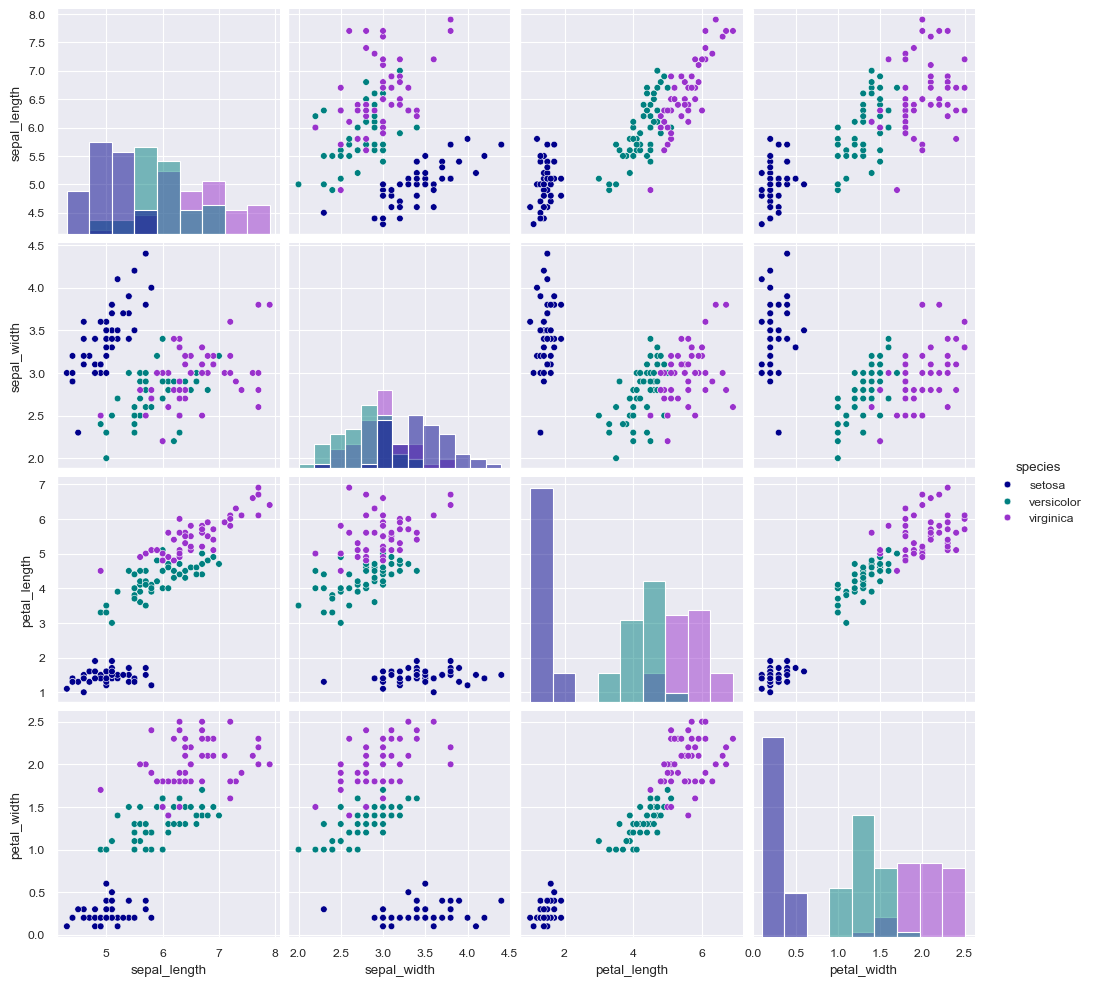

In [42]:
import seaborn as sns

colors = ['darkblue', 'teal', 'darkorchid']
g = sns.pairplot(iris, hue="species", palette=colors, diag_kind="hist", height=2.5)

**PREPARING DATA**

Now we want to split the dataset into training and testing. To do so we have to devide it into _features_ and _targets_ 

In [43]:
X = iris.drop(columns=['species']) 
y = iris['species']

Before going to the train_test_split step we have to normalize the data to improve the model's performance. For that we used ***StandardScaler*** of ***sklearn.preprocessing***

> When we have a big dataset, the values' range won't be the same, so normalizing data will transform it to a common scale

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X) 
X = pd.DataFrame(X)

After removing the targets from features we'll split them into _train models_ and _test models_ using ***train_test_split*** of ***sklearn.model_selection***

> *It's common to use 80% for training and keep the 20% for the test*

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**IMPLEMENTING K-NEAREST NIGHBOR**

We'll start by using KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 100.0


**(Additional step)** We wanted to see how can the value of _k_ affect the result data so we've chosen the k_range from 1 to 100

In [47]:
import numpy as np

error_rate = []
accurarcy_rate = []
k_range = range(1,101)

for i in k_range:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    accurarcy_rate.append(KNN.score(X_test,y_test))

The following graph shows whenever the value of k gets higher, the accurarcy rate fell down which means the model couldn't give us good results. That explains the importance of choosing a best number of neighbors to proceed with the training

Text(0, 0.5, 'Rate')

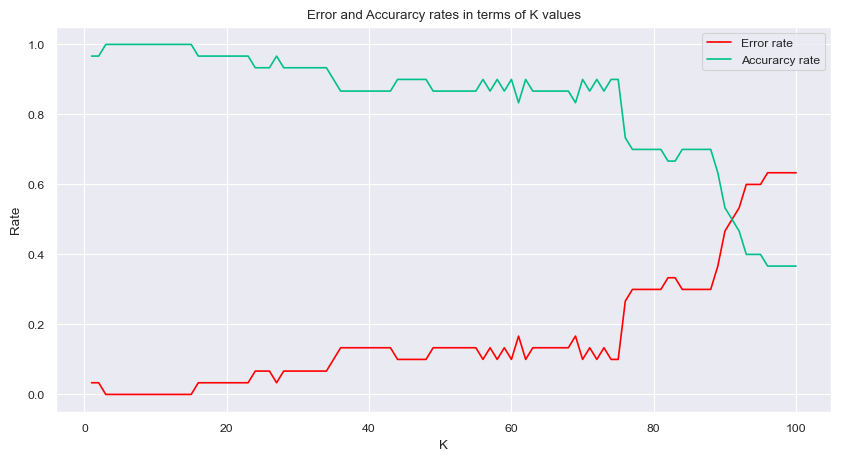

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.set_theme('paper','darkgrid')
    
plt.plot(k_range,error_rate, color='#ff0101')
plt.plot(k_range,accurarcy_rate, color='#00c08d')
plt.legend(['Error rate', 'Accurarcy rate'])
plt.title("Error and Accurarcy rates in terms of K values")
plt.xlabel('K')
plt.ylabel("Rate")

K values with the max accurarcy

In [49]:
max_accuracy = np.max(accurarcy_rate)
max_indices = [i for i, acc in enumerate(accurarcy_rate) if acc == max_accuracy]

# The best k values
k = [k_range[i] for i in max_indices]
k

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

Now we'll implement our own KNN algorithm using the euclidienne distance

In [50]:
def Euclid_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn(xtr, ytr, xt, k=2):
    predictions = list()
    
    for i in xt.index:
        distances = list()
        for j in xtr.index:
            distance = Euclid_distance(xtr.loc[j], xt.loc[i])
            distances.append(distance)
        
        k_ind  = np.argsort(distances)[:k]
        k_neigh = [ytr[l] for l in k_ind]
        most_common = np.bincount(k_neigh).argmax()
        predictions.append(most_common)
    
    return np.array(predictions)

**Testing the method**

In [81]:
# Encoding training labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels_encoded = le.fit_transform(y_train)
# Encoding test labels
test_labels_encoded = le.fit_transform(y_test)

# Trying the function
prediction = knn(X_train,train_labels_encoded, X_test, 2)
accurarcy = np.mean(prediction == test_labels_encoded)*100
accurarcy


np.float64(96.66666666666667)

In this step we're going to repeat the same test we did when using **KNeighborsClassifier** to test the capability of our KNN Algorithm

In [78]:
error_rateb = []
accurarcy_rateb = []
k_range = range(1,101)

for i in k_range:
    pred_i = knn(X_train,train_labels_encoded, X_test, i)
    error_rateb.append(np.mean(pred_i != test_labels_encoded))
    accurarcy_rateb.append(np.mean(pred_i == test_labels_encoded))

Text(0, 0.5, 'Rate')

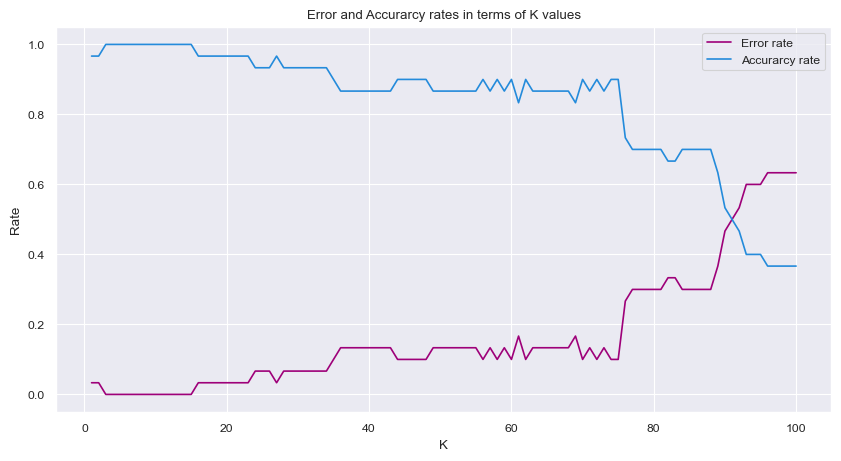

In [80]:
plt.figure(figsize=(10,5))
sns.set_theme('paper','darkgrid')
    
plt.plot(k_range,error_rateb, color='#9e0079')
plt.plot(k_range,accurarcy_rateb, color='#248bdb')
plt.legend(['Error rate', 'Accurarcy rate'])
plt.title("Error and Accurarcy rates in terms of K values")
plt.xlabel('K')
plt.ylabel("Rate")